Статистические тесты — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Статистическая гипотеза — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.

***АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ***

Общий алгоритм проверки гипотезы состоит из шести этапов:

Построение нулевой и альтернативной гипотез.  
Выбор уровня значимости α.  
Сбор данных для проверки гипотезы.  
Выбор статистического теста.  
Проведение статистического теста, вычисление p-value.  
Сравнение p-value c уровнем значимости α и вывод, отклонить или не отклонить нулевую гипотезу.

α ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ

Ещё раз о видах гипотез
Двусторонние:
Нулевая гипотеза: средний чек без просмотра рекомендаций (μ1) равен среднему чеку после просмотра рекомендаций (μ2).

**H0: μ1 = μ2**

Альтернативная гипотеза: средний чек без просмотра рекомендаций (μ1) не равен среднему чеку после просмотра рекомендаций (μ2).

**H1: μ1 ≠ μ2**

Односторонние:

правосторонняя:

Нулевая гипотеза: средний чек без просмотра рекомендаций (μ1) меньше или равен среднему чеку после просмотра рекомендаций (μ2).

**H0: μ1 ≤ μ2**

Альтернативная гипотеза: средний чек без просмотра рекомендаций (μ1) больше среднего чека после просмотра рекомендаций (μ2).

**H1: μ1 > μ2**

левосторонняя:

Нулевая гипотеза: средний чек без просмотра рекомендаций (μ1) больше или равен среднему чеку после просмотра рекомендаций (μ2).

**H0: μ1 ≥ μ2**

Альтернативная гипотеза: средний чек без просмотра рекомендаций (μ1) меньше среднего чека после просмотра рекомендаций (μ2).

**H1: μ1 < μ2**

Выше мы приводили иллюстрацию принятия решения для проверки односторонней (правосторонней) гипотезы:

одна область отклонения нулевой гипотезы (справа);
площадь области = α.

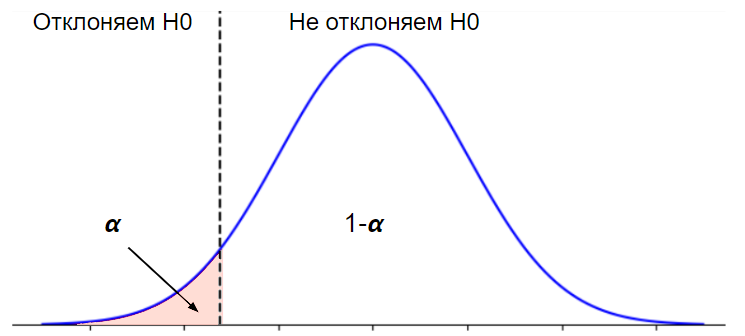

Для двусторонней гипотезы иллюстрация будет следующей:

две области отклонения нулевой гипотезы (справа и слева);
площадь каждой области = α/2.

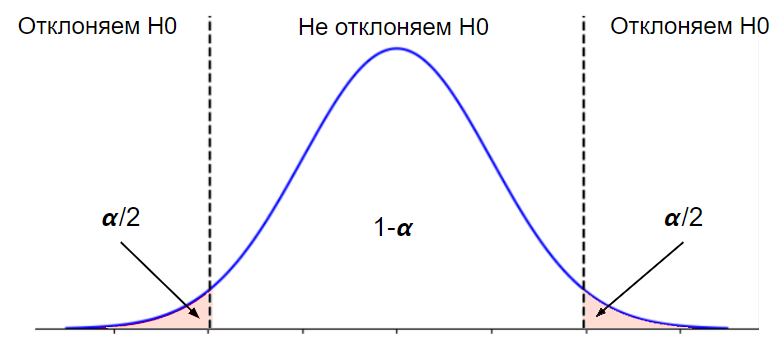

Рассмотрим эту функцию на примере датасета California Housing, входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

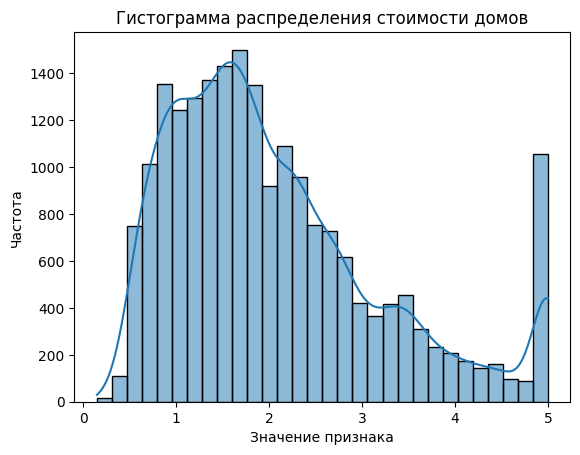

In [3]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Квантиль-квантиль график

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по Q-Q Plots.

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

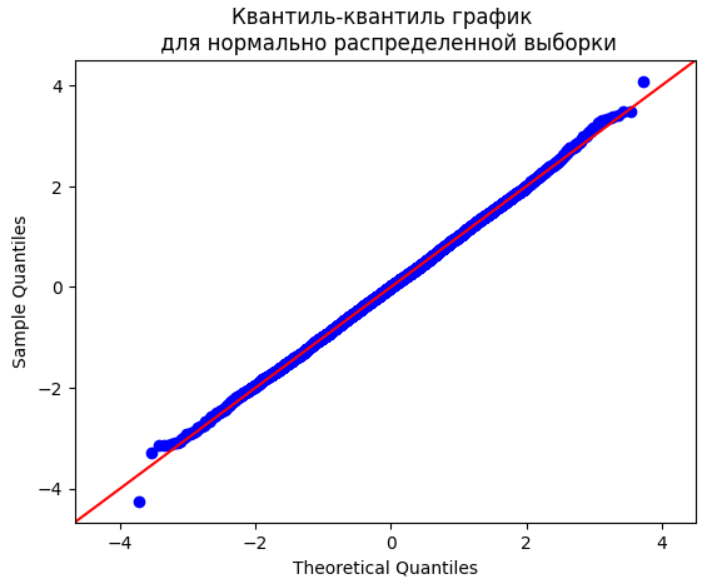

В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

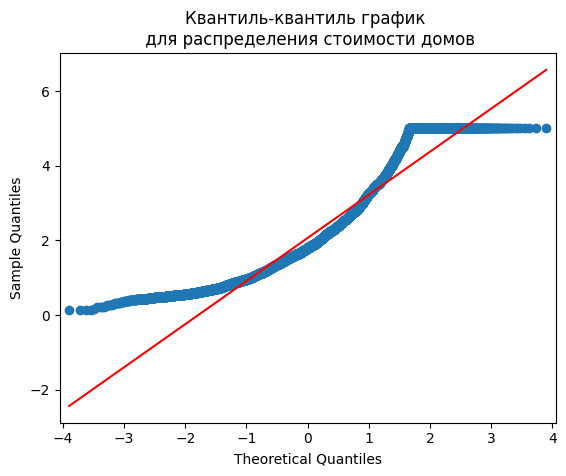

In [4]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод — тест Шапиро — Уилка.

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

In [5]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, тест Д’Агостино или тест Колмогорова — Смирнова. У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них.

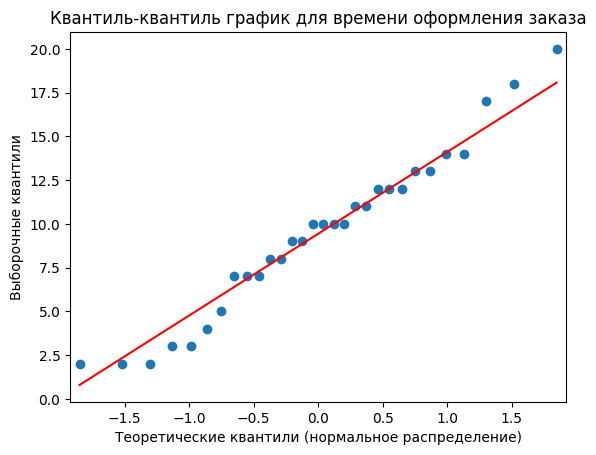

p-value = 0.414
Распределение нормальное


In [6]:
dataset = [12, 8, 9, 10, 11, 12, 7, 12, 2, 10, 3, 9, 18, 4, 11, 13, 13, 17, 14, 3, 10, 2, 2, 7, 14, 8, 20, 5, 7, 10]
data = np.array(dataset)  # Преобразуем в массив NumPy

# Построение Q-Q графика
sm.qqplot(data, line='s')  # line='s' — линия нормального распределения
plt.title('Квантиль-квантиль график для времени оформления заказа')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Выборочные квантили')
plt.show()

import scipy.stats as stats
# задаём уровень значимости
alpha = 0.05 
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

Основные входные параметры:

- a — выборочные данные;
- popmean — ожидаемое среднее значение признака;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя).

In [7]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

Основные входные параметры:

- a, b — выборочные данные двух групп;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя);
- equal_var — равны ли дисперсии в группах (по умолчанию равны).

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» (μ1) меньше или равно среднему времени работы батарей «Заряд» (μ2).

$ H0:μ1≤μ2 $

Альтернативная гипотеза: среднее время работы батарей «Планета» (μ1) больше среднего времени работы батарей «Заряд» (μ2).

$ H1:μ1>μ2 $

Решение на Python:

In [8]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

In [9]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 10 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

In [10]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На одном устройстве замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

Батареи «Заряд»: 36, 45, 41, 41, 35.
Батареи «Планета»: 32, 34, 42, 48, 43.
Батареи «Энергия»: 41, 39, 35, 34, 52.

In [11]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

#              Anova
# ==================================
#       F Value Num DF Den DF Pr > F
# ----------------------------------
# group  0.0100 2.0000 8.0000 0.9900
# ==================================

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



In [12]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print('p-value = {:.3f}'.format(p))


p-value = 0.018


In [13]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_north, data_south, data_east)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(data_north, data_south, data_east)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.150
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [14]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

# проводим тест
_, p = stats.ttest_rel(data_before, data_after, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)

Критерий знаков (для одной группы) используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог одновыборочного t-критерия.

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

In [15]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


U-КРИТЕРИЙ МАННА — УИТНИ

U-критерий Манна — Уитни используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции mannwhitneyu модуля stats библиотеки scipy.

In [17]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


КРИТЕРИЙ УИЛКОКСОНА

Критерий Уилкоксона используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог парного t-критерия.

Критерий Уилкоксона реализован в функции wilcoxon модуля stats библиотеки scipy.

In [18]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

In [19]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


КРИТЕРИЙ ФРИДМАНА

Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог парного ANOVA с повторными измерениями.

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

In [20]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Для категориальных признаков можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты. Например, в выборке клиентов сотового оператора есть 50 человек с тарифом «Ультима», 30 человек — с тарифом «Мега» и 60 человек — с тарифом «Абсолют».

Критерий хи-квадрат позволяет оценить, связаны ли между собой два категориальных признака.

Примеры гипотез:

Есть ли связь между городом и уровнем образования его жителей?

Есть ли связь между тарифом сотового оператора и сферой работы клиента?

Критерий Мак-Немара позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

Примеры гипотез:

Отличается ли доля заболевших гриппом до и после прививки?

Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?

Для этих тестов мы приведём описание, сведения о функциях, которые реализуют их в Python-библиотеках, и примеры использования на Python.

КРИТЕРИЙ ХИ-КВАДРАТ

Критерий хи-квадрат (χ2) используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

Условие применимости критерия хи-квадрат — наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к точному критерию Фишера.

Таблицу сопряжённости можно построить с помощью функции crosstab библиотеки Pandas. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

In [24]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])
display(table)
# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Наличие детей,есть,нет
Тариф,,
Абсолют,2,7
Мега,9,10
Ультима,6,6


p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


КРИТЕРИЙ МАК-НЕМАРА

Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Критерий Мак-Немара реализован в функции mcnemar модуля stats библиотеки statsmodels.

In [27]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

display(table)

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

После,Не пользуется,Пользуется
До,,
Не пользуется,12,12
Пользуется,2,4


p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем — новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие — как 'Нет'. Полученные данные в виде pandas DataFrame data:

In [29]:
data = pd.DataFrame(
    [
        ['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], 
        ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], 
        ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], 
        ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], 
        ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], 
        ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']
    ], columns=['Старая форма', 'Новая форма']
)


In [30]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Старая форма'], data['Новая форма'])

display(table)

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8


p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
